# Practice Project 7: Big Data Mart Sales Problem

In [20]:
#importing librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#viewing data
pd.pandas.set_option('display.max_columns', None)
dataset=pd.read_csv('bigatadata_train.csv')

print(dataset.shape)
dataset.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#Understanding the data: what is needed and what is not needed.
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
#1. Item-Identifier wouldn't be required for the analysis- so I will drop this column
#2. Item-Weight can be a factor of our interest because we can try to figure out what weights are easier for the customers to carry, and also we can see this in relation to the different outlet types.
#3. Item-Fat-Content is also an important identifier of customer preferences
#4. Item-Visibility is also important because this determines sales as well
#5. Item-type, also significant to understand customer preferences
#6. Item-MRP determines the maximum retail price, so it is also important
#7. Outlet-Identifier would not really be rewuired. We want to look at types of outlets instead. So, this one will be dropped.
#8. Outlet-Establishment-Year is also interesting because we can understand whether customers want a new outlet or trust a one that have been there for years.
#9. Outlet-Size and Outlet-Type are also important to understand preferences
#10. Outlet-Location-Type will help us a lot because this determines how much customers in different tiers are prepared to spend on products and etc.

In [7]:
dataset1=dataset.drop(labels='Item_Identifier',axis=1)


In [10]:
data_s=dataset1.drop(labels='Outlet_Identifier', axis=1)
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot:>

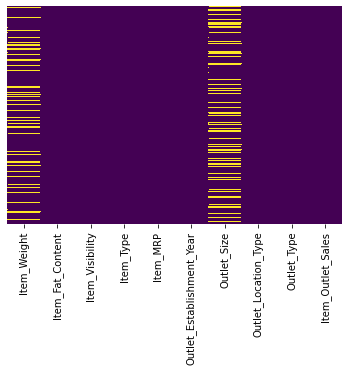

In [11]:
#Finding Missing Values
sns.heatmap(data_s.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [39]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [40]:
data_s.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [52]:
pd.pandas.set_option('display.max_rows', None)
weight_null=data_s[data_s['Item_Weight'].isnull()]
weight_null

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,NaN,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,NaN,Low Fat,0.034238,Hard Drinks,113.2834,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,NaN,Regular,0.035400,Baking Goods,144.5444,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,NaN,Low Fat,0.057557,Baking Goods,107.6938,1985,Small,Tier 1,Grocery Store,214.3876
29,NaN,Regular,0.072222,Canned,43.6454,1985,Small,Tier 1,Grocery Store,125.8362
36,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,NaN,Regular,0.123111,Snack Foods,36.9874,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,NaN,Low Fat,0.026481,Snack Foods,87.6198,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,NaN,Regular,0.255395,Dairy,196.8794,1985,Small,Tier 1,Grocery Store,780.3176
59,NaN,Low Fat,0.061082,Canned,180.0344,1985,Small,Tier 1,Grocery Store,892.1720


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='count'>

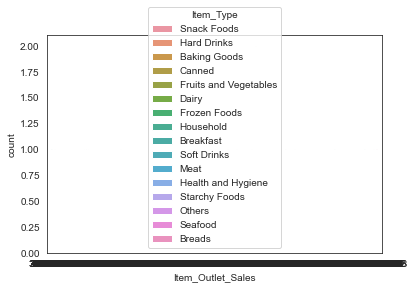

In [54]:
sns.set_style('white')
sns.countplot(x='Item_Outlet_Sales',hue='Item_Type',  data=weight_null)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Weight'>

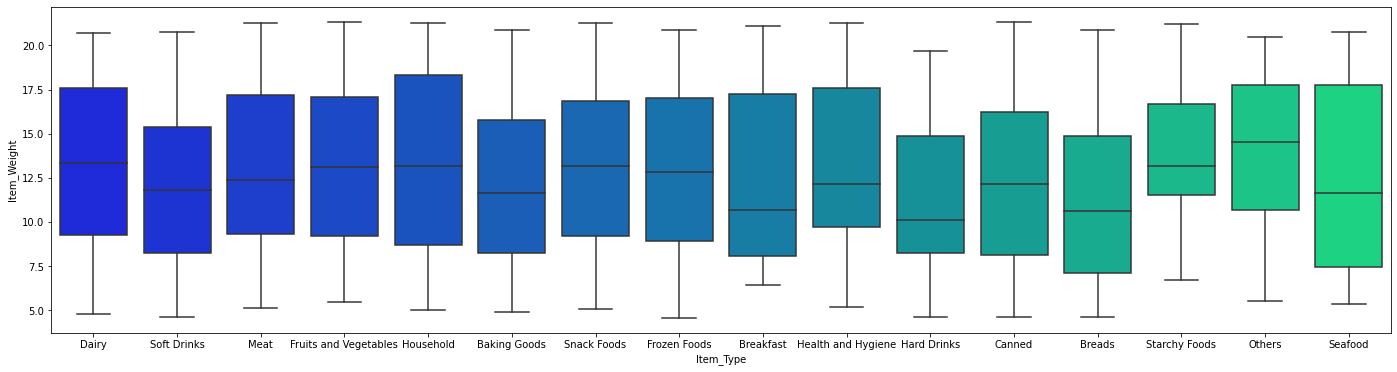

In [17]:
#Let's visualize the dataset further to see how these missing values can be handled

plt.figure(figsize=(24,6))
sns.boxplot(x='Item_Type', y='Item_Weight',data=data_s, palette='winter')


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

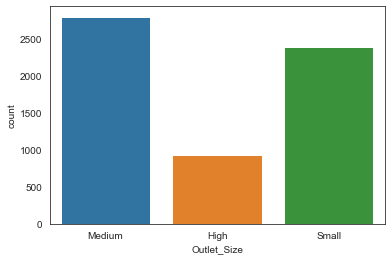

In [28]:
sns.set_style('white')
sns.countplot(x='Outlet_Size', data=dataset)

In [ ]:
#from the countplot above, we can see the frequencies of the outlets according to their size. Given the missing data, this graph can be misleading. Now, I will try to look at the same feature in relation to Outlet_Location_Type, Outlet_Type and Outlet_Establishment_Year for further understanding.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

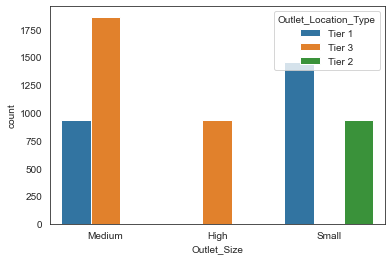

In [26]:
sns.set_style('white')
sns.countplot(x='Outlet_Size', hue='Outlet_Location_Type', data=data_s)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

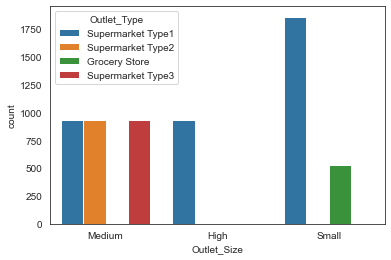

In [25]:
sns.set_style('white')
sns.countplot(x='Outlet_Size', hue='Outlet_Type', data=data_s)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Size'>

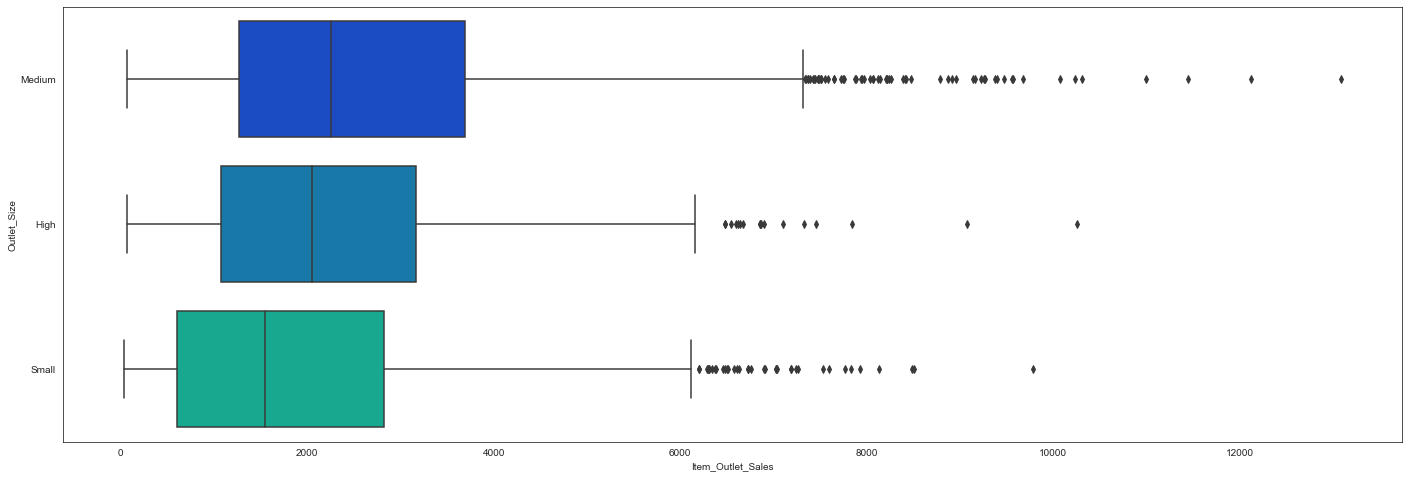

In [32]:
plt.figure(figsize=(24,8))
sns.boxplot(x='Item_Outlet_Sales', y='Outlet_Size',data=data_s, palette='winter')


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Location_Type'>

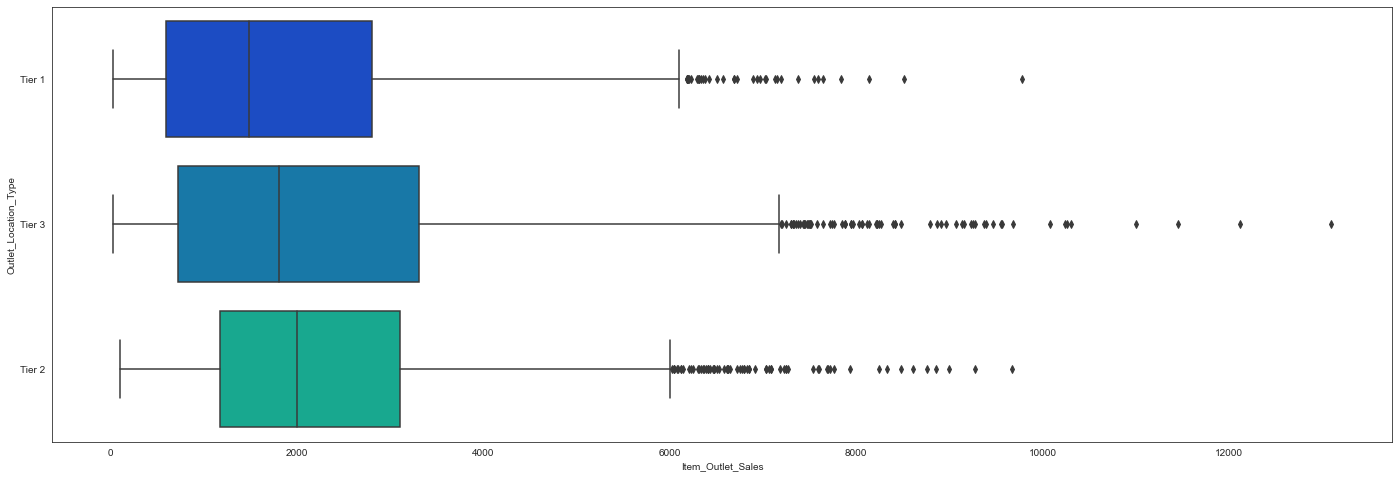

In [35]:
plt.figure(figsize=(24,8))
sns.boxplot(x='Item_Outlet_Sales', y='Outlet_Location_Type',data=data_s, palette='winter')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Type'>

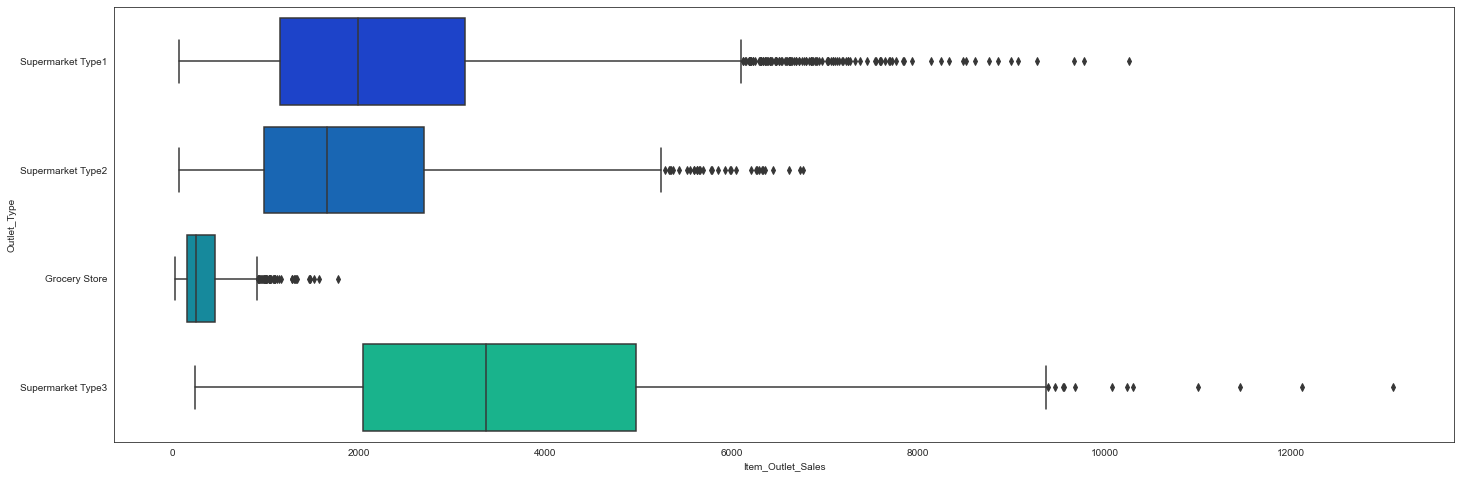

In [36]:
plt.figure(figsize=(24,8))
sns.boxplot(x='Item_Outlet_Sales', y='Outlet_Type',data=data_s, palette='winter')